In [ ]:
from google.colab import files
uploades=files.upload()

Saving dogs.zip to dogs.zip


In [ ]:
!unzip "dogs.zip"

Archive:  dogs.zip
   creating: Dogs/
   creating: Dogs/n02085782-Japanese_spaniel/
  inflating: Dogs/n02085782-Japanese_spaniel/n02085782_1039.jpg  
  inflating: Dogs/n02085782-Japanese_spaniel/n02085782_1058.jpg  
  inflating: Dogs/n02085782-Japanese_spaniel/n02085782_1059.jpg  
  inflating: Dogs/n02085782-Japanese_spaniel/n02085782_1077.jpg  
  inflating: Dogs/n02085782-Japanese_spaniel/n02085782_1085.jpg  
  inflating: Dogs/n02085782-Japanese_spaniel/n02085782_1143.jpg  
  inflating: Dogs/n02085782-Japanese_spaniel/n02085782_1156.jpg  
  inflating: Dogs/n02085782-Japanese_spaniel/n02085782_1191.jpg  
  inflating: Dogs/n02085782-Japanese_spaniel/n02085782_1224.jpg  
  inflating: Dogs/n02085782-Japanese_spaniel/n02085782_126.jpg  
  inflating: Dogs/n02085782-Japanese_spaniel/n02085782_1267.jpg  
  inflating: Dogs/n02085782-Japanese_spaniel/n02085782_1284.jpg  
  inflating: Dogs/n02085782-Japanese_spaniel/n02085782_1348.jpg  
  inflating: Dogs/n02085782-Japanese_spaniel/n02085782_1350

In [ ]:
!ls

Dogs  dogs.zip	sample_data


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        'Dogs/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='training',
        classes=['n02085782-Japanese_spaniel','n02085936-Maltese_dog','n02086240-Shih-Tzu',
                 'n02098105-soft-coated_wheaten_terrier','n02099429-curly-coated_retriever',
                 'n02099601-golden_retriever','n02099712-Labrador_retriever','n02107142-Doberman',
                 'n02110958-pug','n02112018-Pomeranian','n02113712-miniature_poodle'])

Found 1605 images belonging to 11 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
        'Dogs/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='validation',
        classes=['n02085782-Japanese_spaniel','n02085936-Maltese_dog','n02086240-Shih-Tzu',
                 'n02098105-soft-coated_wheaten_terrier','n02099429-curly-coated_retriever',
                 'n02099601-golden_retriever','n02099712-Labrador_retriever','n02107142-Doberman',
                 'n02110958-pug','n02112018-Pomeranian','n02113712-miniature_poodle'])

Found 398 images belonging to 11 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(11, activation='softmax')])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
50/50 [==============================] - 94s 2s/step - loss: 2.3830 - accuracy: 0.1259 - val_loss: 2.2592 - val_accuracy: 0.1823
Epoch 2/10
50/50 [==============================] - 95s 2s/step - loss: 2.2330 - accuracy: 0.2072 - val_loss: 2.1429 - val_accuracy: 0.2370
Epoch 3/10
50/50 [==============================] - 92s 2s/step - loss: 2.0126 - accuracy: 0.3039 - val_loss: 2.0728 - val_accuracy: 0.2448
Epoch 4/10
50/50 [==============================] - 95s 2s/step - loss: 1.9758 - accuracy: 0.3090 - val_loss: 1.9357 - val_accuracy: 0.3177
Epoch 5/10
50/50 [==============================] - 93s 2s/step - loss: 1.8003 - accuracy: 0.3846 - val_loss: 1.9636 - val_accuracy: 0.3099
Epoch 6/10
50/50 [==============================] - 91s 2s/step - loss: 1.6383 - accuracy: 0.4577 - val_loss: 1.9560 - val_accuracy: 0.3411
Epoch 7/10
50/50 [==============================] - 93s 2s/step - loss: 1.3993 - accuracy: 0.5048 - val_loss: 2.0171 - val_accuracy: 0.3385
Epoch 8/10
50/50 [==

In [ ]:
model.save('trained_model_flowers.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# Load and preprocess the image using OpenCV
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))
    img = img.astype("float") / 255.0
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

In [ ]:
# Function to display image using OpenCV
def display_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

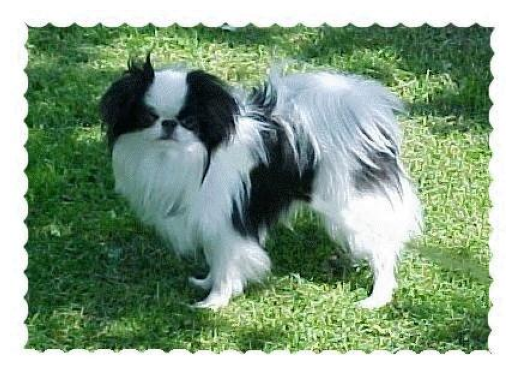

1/1 [==============================] - 0s 43ms/step


In [ ]:
# Testing the model with a sample image
sample_image_path = 'Dogs/n02085782-Japanese_spaniel/n02085782_2.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)
predicted_class=np.argmax(prediction, axis=1)

In [ ]:
class_indices={v:k for k,v in train_generator.class_indices.items()}
predicted_class_name= class_indices[predicted_class[0]]

In [ ]:
print(f"predicted breed: {predicted_class_name}")

predicted breed: n02085782-Japanese_spaniel


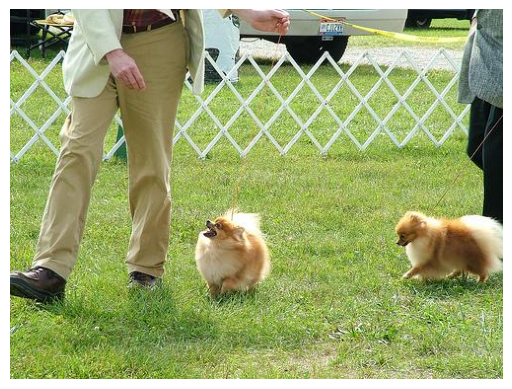

1/1 [==============================] - 0s 67ms/step


In [ ]:
# Testing the model with a sample image
sample_image_path = 'Dogs/n02112018-Pomeranian/n02112018_336.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)
predicted_class=np.argmax(prediction, axis=1)

In [ ]:
class_indices={v:k for k,v in train_generator.class_indices.items()}
predicted_class_name= class_indices[predicted_class[0]]

In [ ]:
print(f"predicted breed: {predicted_class_name}")

predicted breed: n02112018-Pomeranian


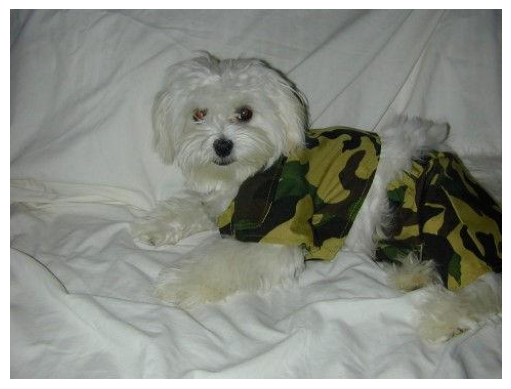

1/1 [==============================] - 0s 42ms/step


In [ ]:
# Testing the model with a sample image
sample_image_path = 'Dogs/n02085936-Maltese_dog/n02085936_719.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)
predicted_class=np.argmax(prediction, axis=1)

In [ ]:
class_indices={v:k for k,v in train_generator.class_indices.items()}
predicted_class_name= class_indices[predicted_class[0]]

In [ ]:
print(f"predicted breed: {predicted_class_name}")

predicted breed: n02110958-pug


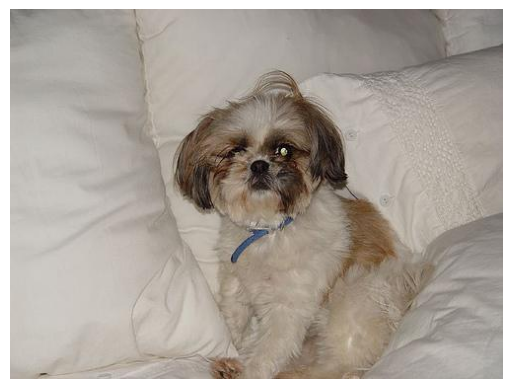

1/1 [==============================] - 0s 35ms/step


In [ ]:
# Testing the model with a sample image
sample_image_path = 'Dogs/n02086240-Shih-Tzu/n02086240_9.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)
predicted_class=np.argmax(prediction, axis=1)

In [ ]:
class_indices={v:k for k,v in train_generator.class_indices.items()}
predicted_class_name= class_indices[predicted_class[0]]

In [ ]:
print(f"predicted breed: {predicted_class_name}")

predicted breed: n02110958-pug


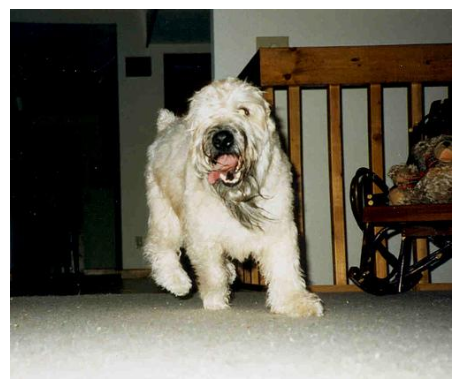

1/1 [==============================] - 0s 38ms/step


In [ ]:
# Testing the model with a sample image
sample_image_path = 'Dogs/n02098105-soft-coated_wheaten_terrier/n02098105_100.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)
predicted_class=np.argmax(prediction, axis=1)

In [ ]:
class_indices={v:k for k,v in train_generator.class_indices.items()}
predicted_class_name= class_indices[predicted_class[0]]

In [ ]:
print(f"predicted breed: {predicted_class_name}")

predicted breed: n02086240-Shih-Tzu


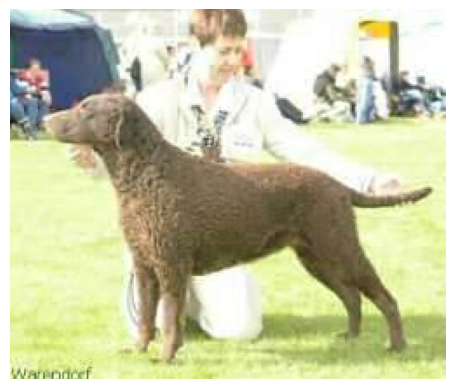

1/1 [==============================] - 0s 34ms/step


In [ ]:
# Testing the model with a sample image
sample_image_path = 'Dogs/n02099429-curly-coated_retriever/n02099429_159.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)
predicted_class=np.argmax(prediction, axis=1)

In [ ]:
class_indices={v:k for k,v in train_generator.class_indices.items()}
predicted_class_name= class_indices[predicted_class[0]]

In [ ]:
print(f"predicted breed: {predicted_class_name}")

predicted breed: n02113712-miniature_poodle


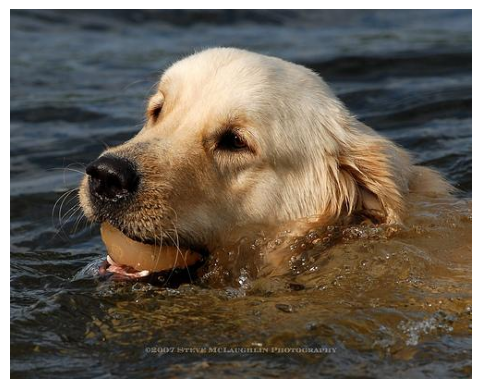

1/1 [==============================] - 0s 75ms/step


In [ ]:
# Testing the model with a sample image
sample_image_path = 'Dogs/n02099601-golden_retriever/n02099601_70.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)
predicted_class=np.argmax(prediction, axis=1)

In [ ]:
class_indices={v:k for k,v in train_generator.class_indices.items()}
predicted_class_name= class_indices[predicted_class[0]]

In [ ]:
print(f"predicted breed: {predicted_class_name}")

predicted breed: n02086240-Shih-Tzu


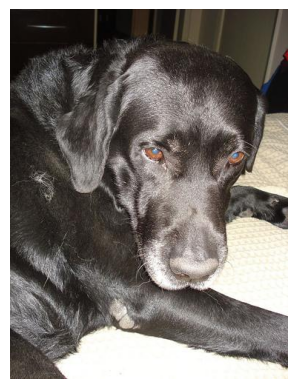

1/1 [==============================] - 0s 40ms/step


In [ ]:
# Testing the model with a sample image
sample_image_path = 'Dogs/n02099712-Labrador_retriever/n02099712_129.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)
predicted_class=np.argmax(prediction, axis=1)

In [ ]:
class_indices={v:k for k,v in train_generator.class_indices.items()}
predicted_class_name= class_indices[predicted_class[0]]

In [ ]:
print(f"predicted breed: {predicted_class_name}")

predicted breed: n02098105-soft-coated_wheaten_terrier


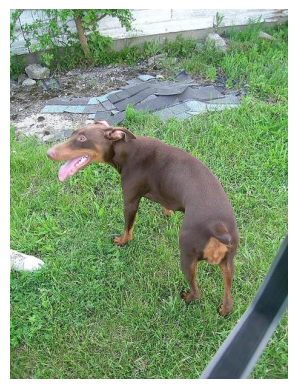

1/1 [==============================] - 0s 93ms/step


In [ ]:
# Testing the model with a sample image
sample_image_path = 'Dogs/n02107142-Doberman/n02107142_413.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)
predicted_class=np.argmax(prediction, axis=1)

In [ ]:
class_indices={v:k for k,v in train_generator.class_indices.items()}
predicted_class_name= class_indices[predicted_class[0]]

In [ ]:
print(f"predicted breed: {predicted_class_name}")

predicted breed: n02110958-pug


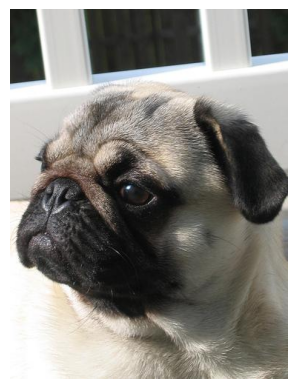

1/1 [==============================] - 0s 38ms/step


In [ ]:
# Testing the model with a sample image
sample_image_path = 'Dogs/n02110958-pug/n02110958_353.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)
predicted_class=np.argmax(prediction, axis=1)

In [ ]:
class_indices={v:k for k,v in train_generator.class_indices.items()}
predicted_class_name= class_indices[predicted_class[0]]

In [ ]:
print(f"predicted breed: {predicted_class_name}")

predicted breed: n02110958-pug


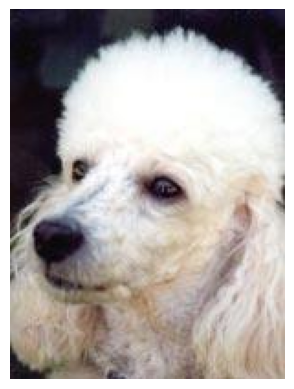

1/1 [==============================] - 0s 41ms/step


In [ ]:
# Testing the model with a sample image
sample_image_path = 'Dogs/n02113712-miniature_poodle/n02113712_171.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)
predicted_class=np.argmax(prediction, axis=1)

In [ ]:
class_indices={v:k for k,v in train_generator.class_indices.items()}
predicted_class_name= class_indices[predicted_class[0]]

In [ ]:
print(f"predicted breed: {predicted_class_name}")

predicted breed: n02085936-Maltese_dog


In [ ]:
loss,accuracy=model.evaluate(validation_generator)
print(f'validation loss:{loss}')
print(f'validation accuracy: {accuracy}')

13/13 [==============================] - 8s 610ms/step - loss: 3.3344 - accuracy: 0.2965
validation loss:3.3343985080718994
validation accuracy: 0.2964824140071869
